In [3]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np

from Image import Images
from utils import show_analyze_result, decision_tree_result
from sklearn import svm
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')

In [4]:
i1 = Images('6070_2_3', 6)
i2 = Images('6090_2_0', 6)
i3 = Images('6100_2_2', 6)
i4 = Images('6110_4_0', 6)
i5 = Images('6160_2_1', 6)
tr_data1 = i1.get_all_tr_data()
tr_data2 = i2.get_all_tr_data()
tr_data3 = i3.get_all_tr_data()
tr_data4 = i4.get_all_tr_data()
tr_data5 = i5.get_all_tr_data()
labels1 = i1.mask_of(['7', '8'], False).flatten()
labels2 = i2.mask_of(['7', '8'], False).flatten()
labels3 = i3.mask_of(['7', '8'], False).flatten()
labels4 = i4.mask_of(['7', '8'], False).flatten()
labels5 = i5.mask_of(['7', '8'], False).flatten()

In [5]:
tr_data_all = np.vstack((tr_data1, tr_data3, tr_data5))
labels_all = np.hstack((labels1, labels3, labels5))

In [6]:
pca = PCA(n_components = 4)
tr_data_all_pca = pca.fit_transform(tr_data_all)

In [7]:
clf = svm.LinearSVC()
clf = clf.fit(tr_data_all_pca, labels_all)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)                 39               4927   0.79%
1  NEGATIVE (TRUTH)               3146             307716  98.99%
2               REL              1.22%             98.42%       -
Average accuracy: 49.89%
Average reliability: 49.82%
Overall accuracy: 97.44%


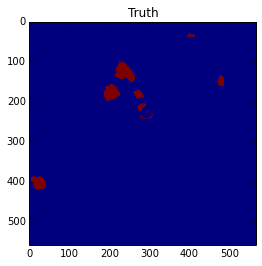

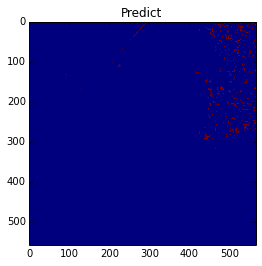

In [8]:
result4 = decision_tree_result(i4, clf.predict(pca.transform(tr_data4)), labels4)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)               1057                387  73.20%
1  NEGATIVE (TRUTH)               1519             312307  99.52%
2               REL             41.03%             99.88%       -
Average accuracy: 86.36%
Average reliability: 70.45%
Overall accuracy: 99.40%


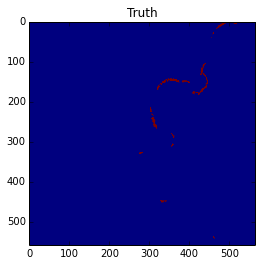

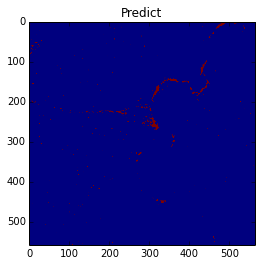

In [9]:
result2 = decision_tree_result(i2, clf.predict(pca.transform(tr_data2)), labels2)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)              16016              19557  45.02%
1  NEGATIVE (TRUTH)                163             274512  99.94%
2               REL             98.99%             93.35%       -
Average accuracy: 72.48%
Average reliability: 96.17%
Overall accuracy: 93.64%


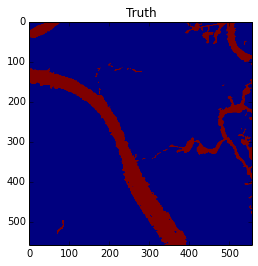

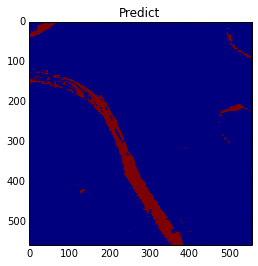

In [10]:
result1 = decision_tree_result(i1, clf.predict(pca.transform(tr_data1)), labels1)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)               4611               2646  63.54%
1  NEGATIVE (TRUTH)               5281             302732  98.29%
2               REL             46.61%             99.13%       -
Average accuracy: 80.91%
Average reliability: 72.87%
Overall accuracy: 97.49%


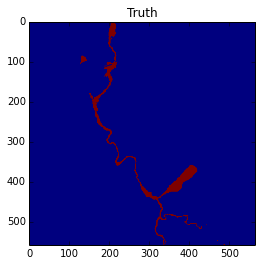

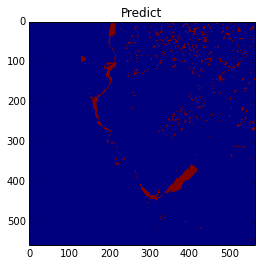

In [11]:
result3 = decision_tree_result(i3, clf.predict(pca.transform(tr_data3)), labels3)

                  - POSITIVE (PREDICT) NEGATIVE (PREDICT)     ACC
0  POSITIVE (TRUTH)                  0                  0       -
1  NEGATIVE (TRUTH)                 38             315232  99.99%
2               REL              0.00%            100.00%       -
Average accuracy: -
Average reliability: 50.00%
Overall accuracy: 99.99%


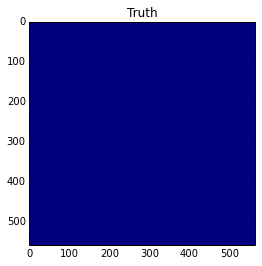

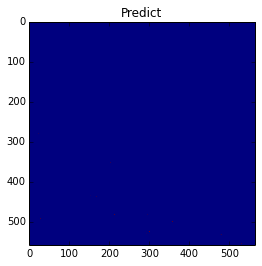

In [12]:
result5 = decision_tree_result(i5, clf.predict(pca.transform(tr_data5)), labels5)